# Qn2

Epoch [100/1000, Loss: 28.734898]
Epoch [200/1000, Loss: 19.874624]
Epoch [300/1000, Loss: 6.005216]
Epoch [400/1000, Loss: 4.085894]
Epoch [500/1000, Loss: 2.882906]
Epoch [600/1000, Loss: 2.045199]
Epoch [700/1000, Loss: 1.846091]
Epoch [800/1000, Loss: 1.761788]
Epoch [900/1000, Loss: 1.721123]
Epoch [1000/1000, Loss: 1.689372]

Final training loss: 1.689253


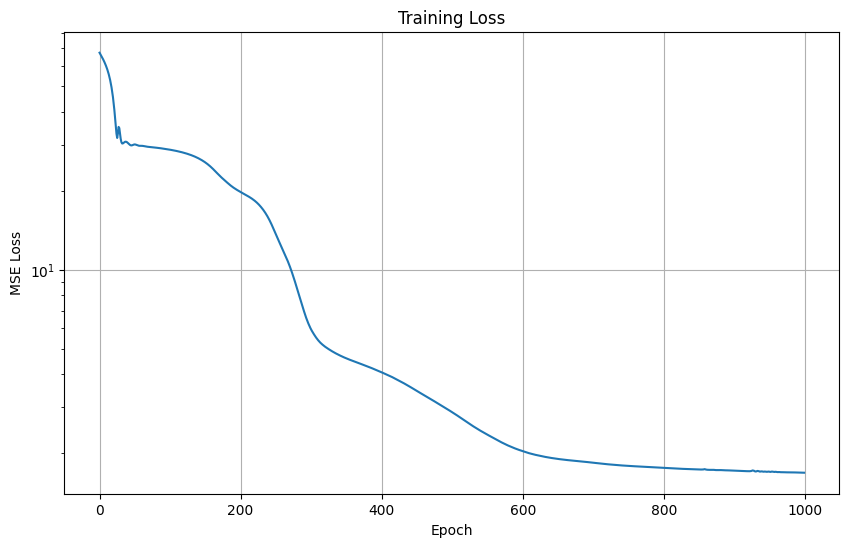

In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate training data
num_sequences = 8
sequence_length = 100
input_dim = 3

# Generate input sequences
X_train = np.random.uniform(0, 1.0, (num_sequences, sequence_length, input_dim))

# Generate output sequences
def generate_output_sequences(X):
    num_sequences, seq_len, input_dim = X.shape
    output_dim = 2
    Y = np.zeros((num_sequences, seq_len, output_dim))

    for seq_idx in range(num_sequences):
        for t in range(seq_len):
            epsilon = np.random.randn()
            # t represents the time step in the Recurrent Neural Network (RNN)

            # y1(t)
            if t == 0:
                y1 = 5 * X[seq_idx, t, 0] + 0.1 * epsilon
            else:
                y1 = 5 * X[seq_idx,t ,0] - 0.2 * X[seq_idx, t-1, 2] + 0.1 * epsilon

            # y2(t)
            if t < 3:
                y2 = 0.1 * epsilon
            else:
                y2 = 25 * X[seq_idx, t-1, 1] * X[seq_idx, t-3, 2] + 0.1 * epsilon

            Y[seq_idx, t, 0] = y2
            Y[seq_idx, t, 1] = y2

    return Y

Y_train = generate_output_sequences(X_train)

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_dim)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

# Model parameters
input_dim = 3
hidden_dim = 5
output_dim = 2

model = SimpleRNN(input_dim, hidden_dim, output_dim)

# Prepare data
X_tensor = torch.FloatTensor(X_train)
Y_tensor = torch.FloatTensor(Y_train)

# Training
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}, Loss: {loss.item():.6f}]')

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_tensor)
    final_loss = criterion(predictions, Y_tensor)
    print(f"\nFinal training loss: {final_loss.item():.6f}")

# Plot training loss
plt.figure(figsize=(10,6))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

# Qn3

Training data
Input: [1. 2. 5. 6.] -> Output: [ 1.  3.  7. 11.]
Input: [5. 7. 7. 8.] -> Output: [ 5. 12. 14. 15.]
Input: [3. 4. 5. 7.] -> Output: [ 3.  7.  9. 12.]

Input tensor shape: torch.Size([3, 4, 1])

Output tensor shape: torch.Size([3, 4, 1])

Starting training...
Epoch [500/5000], Loss: 19.76250267
Epoch [1000/5000], Loss: 5.69038153
Epoch [1500/5000], Loss: 1.90989363
Epoch [2000/5000], Loss: 0.55112094
Epoch [2500/5000], Loss: 0.14967608
Epoch [3000/5000], Loss: 0.04682644
Epoch [3500/5000], Loss: 0.02138791
Epoch [4000/5000], Loss: 0.01559611
Epoch [4500/5000], Loss: 0.01004039
Epoch [5000/5000], Loss: 0.00485190
Training completed

Final training loss: 0.00484239

Training results:
Input: [1. 2. 5. 6.]
True: [ 1.  3.  7. 11.]
Predicted: [ 1.0052438  2.9987974  7.001212  10.998996 ]
MSE: 0.000008

Input: [5. 7. 7. 8.]
True: [ 5. 12. 14. 15.]
Predicted: [ 5.041994 11.928064 14.1268   14.813168]
MSE: 0.014481

Input: [3. 4. 5. 7.]
True: [ 3.  7.  9. 12.]
Predicted: [ 2.987868

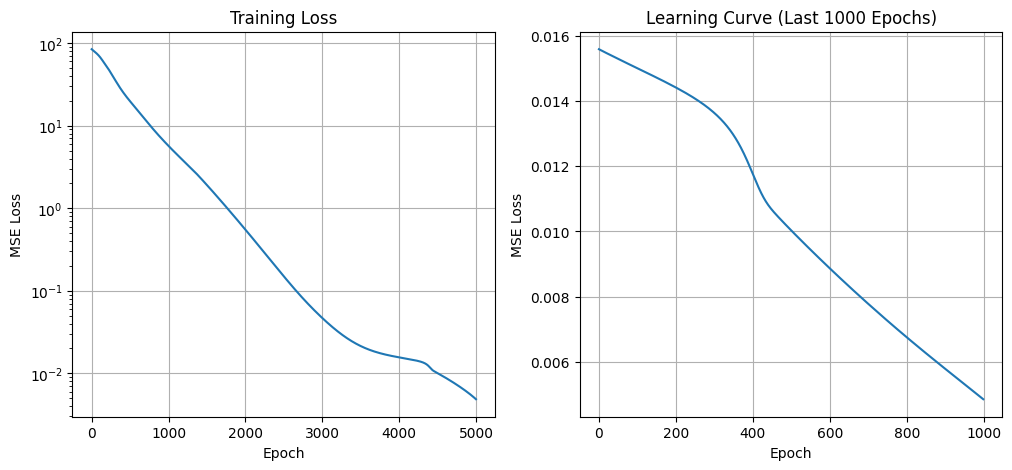

In [21]:
# Analysing the input x and output y, can determine that the following equation:
# y(t) = y(t-1) + f(x(t))

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Given training data
X_train = np.array([
    [1,2,5,6],
    [5,7,7,8],
    [3,4,5,7]
], dtype=np.float32)

Y_train = np.array([
    [1,3,7,11],
    [5,12,14,15],
    [3,7,9,12]
], dtype=np.float32)

print("Training data")
for i in range(len(X_train)):
    print(f"Input: {X_train[i]} -> Output: {Y_train[i]}")

# Reshape data for LSTM: (num_sequences, sequences_length, input_size)
# 3 sequences, each of length 4, with 1 feature per time step
X_tensor = torch.tensor(X_train).unsqueeze(-1) # Shape = (3,4,1)
Y_tensor = torch.tensor(Y_train).unsqueeze(-1) # Shape = (3,4,1)

print(f"\nInput tensor shape: {X_tensor.shape}")
print(f"\nOutput tensor shape: {Y_tensor.shape}")

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers = 1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers with 10 units
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Output layer
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        # Initialise hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # LSTM forward pass
        lstm_out, (hn, cn) = self.lstm(x, (h0, c0))

        # Apply output layer
        out = self.fc(lstm_out)

        return out

# Model parameters
input_size = 1
hidden_size = 10
output_size = 1
num_layers = 1

model = LSTMModel(input_size, hidden_size, output_size, num_layers)

# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 5000
print_interval = 500

# Training Loop
losses = []

print("\nStarting training...")
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Print progress
    if (epoch + 1) % print_interval == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.8f}')

print("Training completed")

# Plot Learning Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(losses[-1000:])
plt.title('Learning Curve (Last 1000 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)

# Evaluate on Training Data
model.eval()
with torch.no_grad():
    train_predictions = model(X_tensor)
    train_loss = criterion(train_predictions, Y_tensor)
    print(f"\nFinal training loss: {train_loss.item():.8f}")

    print("\nTraining results:")
    for i in range(len(X_train)):
        actual = Y_tensor[i].squeeze().numpy()
        predicted = train_predictions[i].squeeze().numpy()
        print(f"Input: {X_train[i]}")
        print(f"True: {actual}")
        print(f"Predicted: {predicted}")
        print(f"MSE: {np.mean((actual - predicted)**2):.6f}\n")

# Test on new sequences
test_sequences = np.array([
    [1,2,3,4],
    [4,5,6,7]
], dtype=np.float32)

X_test = torch.tensor(test_sequences).unsqueeze(-1)

print("Testing on new sequences:")
with torch.no_grad():
    test_predictions = model(X_test)

    for i in range(len(test_sequences)):
        input_seq = test_sequences[i]
        output_seq = test_predictions[i].squeeze().numpy()
        print(f"Input: {input_seq}")
        print(f"Predicted Output: {output_seq}")
        print()

# Qn4

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

# Positive sentiments
positive_texts = [
    "I watched the movie with great interest",
    "Good to see that movie",
    "I liked the movie great",
    "The movie was of interest to me"
]

# Negative sentiments
negative_texts = [
    "I did not like the movie",
    "The movie was not good",
    "I have seen better movies",
    "I am not a fan of movies",
    "I thought they could show interesting scenes",
    "The movie did not have good scenes",
    "Family did not like the movie at all"
]

# Combine and label data
texts = positive_texts + negative_texts
labels = [1] * len(positive_texts) + [0] * len(negative_texts)

print(f"Total samples: {len(texts)}")
print(f"Positive samples: {len(positive_texts)}")
print(f"Negative samples: {len(negative_texts)}")

Total samples: 11
Positive samples: 4
Negative samples: 7


In [30]:
class CharVocabulary:
    def __init__(self, texts, max_length=40):
        self.max_length = max_length

        # Create character vocabulary
        all_chars = ''.join(texts)
        self.char_freq = Counter(all_chars)

        # Create char to id mapping (include padding and unknown)
        self.char2id = {'<PAD>':0, '<UNK>':1}
        current_id = 2

        for char, freq in self.char_freq.most_common():
            if freq >= 1:  # Include all characters that appears at least once
                self.char2id[char] = current_id
                current_id += 1

        self.id2char = {v: k for k, v in self.char2id.items()}
        self.vocab_size = len(self.char2id)

    def text_to_ids(self,text):
        """Convert text to character ids with padding/truncation"""
        # Convert to lowercase and get character ids
        text = text.lower()
        char_ids = [self.char2id.get(char,1) for char in text]  # 1 for UNK

        # Pad or truncate to max_length
        if len(char_ids) < self.max_length:
            char_ids = char_ids + [0] * (self.max_length - len(char_ids))
        else:
            char_ids = char_ids[:self.max_length]

        return char_ids

    def ids_to_text(self, ids):
        """Convert character IDs back to text"""
        return ''.join([self.id2char.get(id, '?') for id in ids if id != 0])

# Create vocabulary
vocab = CharVocabulary(texts, max_length=40)

# Convert all texts to character ids
text_ids = [vocab.text_to_ids(text) for text in texts]
text_ids = torch.tensor(text_ids, dtype=torch.long)
labels = torch.tensor(labels, dtype=torch.long)

print(f"Text IDs shape: {text_ids.shape}")
print(f"Labels shape: {labels.shape}")

Text IDs shape: torch.Size([11, 40])
Labels shape: torch.Size([11])


In [31]:
class CharGRUSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim=50, hidden_size=10,
                 output_size=2, dropout_prob=0.7):
        super(CharGRUSentiment, self).__init__()

        self.hidden_size = hidden_size
        self.embedding_dim = embedding_dim

        # Character embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # GRU layer with dropout
        self.gru = nn.GRU(embedding_dim, hidden_size, batch_first=True,
                          dropout=dropout_prob if dropout_prob > 0 else 0)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)

        # Output layer
        self.fc = nn.Linear(hidden_size, output_size)

        # Initialise weights
        self._init_weights()

    def _init_weights(self):
        """Initialise weights for better training"""
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0.0)

    def forward(self, x, hidden=None):
        batch_size = x.size(0)

        # Initialise hidden state if not provided
        if hidden is None:
            hidden = torch.zeros(1, batch_size, self.hidden_size)

        # Character embeddings
        embedded = self.embedding(x)    # (batch, seq_len, embedding_dim)

        # GRU forward pass
        gru_out, hidden = self.gru(embedded, hidden)    # (batch, seq_len, hidden_size)

        # Use the last hidden state for classification
        last_hidden = gru_out[:, -1, :] # (batch, hidden_size)

        # Apply dropout
        last_hidden = self.dropout(last_hidden)

        # Final output
        output = self.fc(last_hidden)   # (batch, output_size)

        return output, hidden

# Model parameters
vocab_size = vocab.vocab_size
embedding_dim = 50
hidden_size = 10 # 10 GRU units as specified
output_size = 2 # Positive/Negative
dropout_prob = 0.7

model = CharGRUSentiment(vocab_size, embedding_dim, hidden_size, output_size, dropout_prob)

print("Model Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

Model Architecture:
CharGRUSentiment(
  (embedding): Embedding(28, 50, padding_idx=0)
  (gru): GRU(50, 10, batch_first=True, dropout=0.7)
  (dropout): Dropout(p=0.7, inplace=False)
  (fc): Linear(in_features=10, out_features=2, bias=True)
)

Total parameters: 3282


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.7 and num_layers=1
  warnings.warn(


In [32]:
# Split data into train and validation
dataset_size = len(text_ids)
indices = list(range(dataset_size))
random.shuffle(indices)

##split = int(0.8 * dataset_size) # 80% train, 20% validation

split = int(dataset_size)
train_indices = indices[:split]
##val_indices = indices[split:]

train_texts = text_ids[train_indices]
train_labels = labels[train_indices]
##val_texts = text_ids[val_indices]
##val_labels = labels[val_indices]

print(f"Training samples: {len(train_texts)}")
##print(f"Validation samples: {len(val_texts)}")

# Training parameters
learning_rate = 0.001
num_epochs = 500
batch_size = 4

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create data loaders
train_dataset = torch.utils.data.TensorDataset(train_texts, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

##val_dataset = torch.utils.data.TensorDataset(val_texts, val_labels)
##val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

Training samples: 11


In [33]:
def calculate_accuracy(outputs, labels):
    """Calculate accuracy given model outputs and true labels"""
    _, predicted = torch.max(outputs.data, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    return correct/total

# Track metrics
train_losses = []
##val_losses = []
train_accuracies = []
##val_accuracies = []

print("Starting training...")
for epoch in range(num_epochs):
    # Training phase
    model.train()
    epoch_train_loss = 0
    epoch_train_acc = 0
    batch_count = 0

    for batch_texts, batch_labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs, _ = model(batch_texts)
        loss = criterion(outputs, batch_labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Track metrics
        epoch_train_loss += loss.item()
        epoch_train_acc += calculate_accuracy(outputs, batch_labels)
        batch_count += 1

    # Calculate epoch averages
    avg_train_loss = epoch_train_loss / batch_count
    avg_train_acc = epoch_train_acc / batch_count

    '''
    # Validation phase
    model.eval()
    epoch_val_loss = 0
    epoch_val_acc = 0
    batch_count = 0

    with torch.no_grad():
        for batch_texts, batch_labels in val_loader:
            outputs, _ = model(batch_texts)
            loss = criterion(outputs, batch_labels)

            epoch_val_loss += loss.item()
            epoch_val_acc += calculate_accuracy(outputs, batch_labels)
            batch_count += 1

    avg_val_loss = epoch_val_loss / batch_count
    avg_val_acc = epoch_val_acc / batch_count
    '''

    # Store metrics
    train_losses.append(avg_train_loss)
    ##val_losses.append(avg_val_loss)
    train_accuracies.append(avg_train_acc)
    ##val_accuracies.append(avg_val_acc)

    # Print progress
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], '
            f'Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, ')
            ##f'Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}')

print("Training Completed")

Starting training...
Epoch [50/500], Train Loss: 0.6190, Train Acc: 0.8333, 
Epoch [100/500], Train Loss: 0.4901, Train Acc: 0.7222, 
Epoch [150/500], Train Loss: 0.1470, Train Acc: 1.0000, 
Epoch [200/500], Train Loss: 0.0913, Train Acc: 1.0000, 
Epoch [250/500], Train Loss: 0.0255, Train Acc: 1.0000, 
Epoch [300/500], Train Loss: 0.0117, Train Acc: 1.0000, 
Epoch [350/500], Train Loss: 0.0514, Train Acc: 1.0000, 
Epoch [400/500], Train Loss: 0.0712, Train Acc: 1.0000, 
Epoch [450/500], Train Loss: 0.0216, Train Acc: 1.0000, 
Epoch [500/500], Train Loss: 0.0134, Train Acc: 1.0000, 
Training Completed


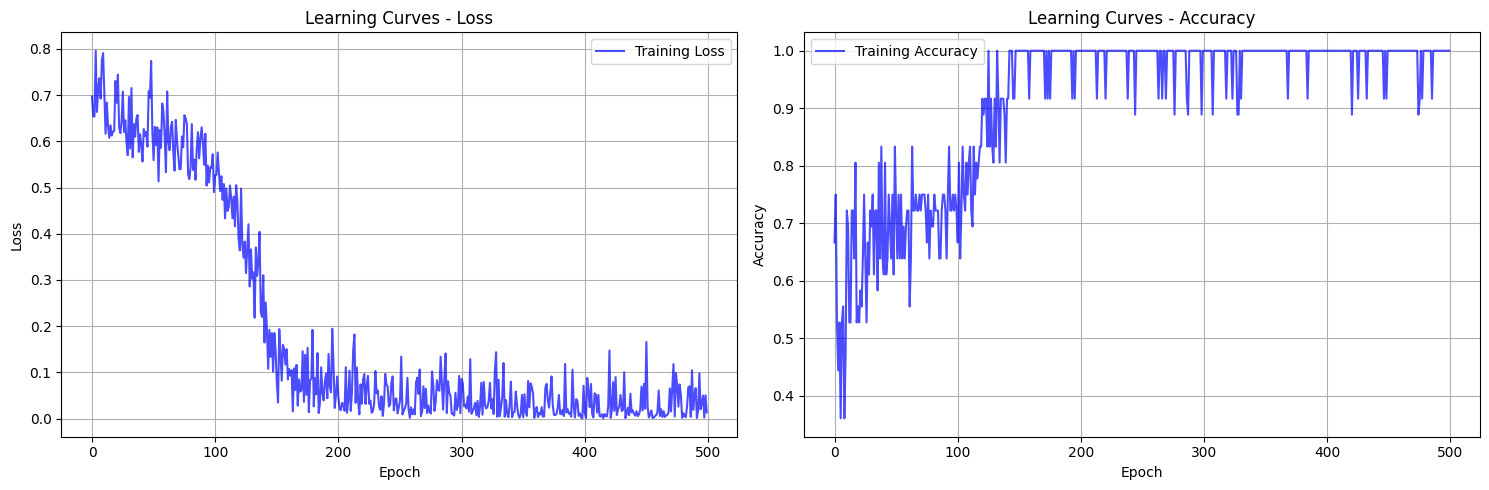


Final Training Accuracy: 1.0000


In [34]:
# Plot train and accuracy curves
plt.figure(figsize=(15,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(train_losses, label="Training Loss", color='blue', alpha=0.7)
##plt.plot(val_losses, label="Validation Loss", color='red', alpha=0.7)
plt.title('Learning Curves - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Training Accuracy', color='blue', alpha=0.7)
##plt.plot(val_accuracies, label='Validation Accuracy', color='red', alpha=0.7)
plt.title('Learning Curves - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Final metrics
final_train_acc = train_accuracies[-1]
##final_val_acc = val_accuracies[-1]
print(f"\nFinal Training Accuracy: {final_train_acc:.4f}")
##print(f"Final Validation Accuracy: {final_val_acc:.4f}")

In [35]:
def predict_sentiment(text, model, vocab):
    """Predict sentiment likelihood for a given text"""
    model.eval()

    # Covert text to character ids
    text_ids = vocab.text_to_ids(text)
    text_tensor = torch.tensor([text_ids], dtype=torch.long)

    # Get model prediction
    with torch.no_grad():
        outputs, _ = model(text_tensor)
        probabilities = torch.softmax(outputs, dim=1)

    # Convert to likelihoods
    negative_probs = probabilities[0][0].item() # Class 0: Negative
    positive_probs = probabilities[0][1].item() # Class 1: Positive

    return negative_probs, positive_probs

# Test sentences
test_sentences = [
    "The movie was not interesting to me",
    "I liked the movie with great interest"
]

print("\n" + "="*60)
print("SENTIMENT PREDICTION RESULTS")
print("="*60)

for sentence in test_sentences:
    neg_prob, pos_prob = predict_sentiment(sentence, model, vocab)

    print(f"\nSentence: '{sentence}'")
    print(f"Negative sentiment likelihood: {neg_prob:.4f} ({neg_prob*100:.2f}%)")
    print(f"Positive sentiment likelihood: {pos_prob:.4f} ({pos_prob*100:.2f}%)")

    if pos_prob > neg_prob:
        print("Predicted sentiment: POSITIVE")
    else:
        print("Predicted sentiment: NEGATIVE")

# Additional analysis
print("\n" + "="*60)
print("MODEL ANALYSIS")
print("="*60)
print(f"Vocabulary size: {vocab.vocab_size}")
print(f"GRU hidden units: {hidden_size}")
print(f"Dropout probability: {dropout_prob}")
print(f"Learning rate: {learning_rate}")
print(f"Maximum sequence length: {vocab.max_length}")


SENTIMENT PREDICTION RESULTS

Sentence: 'The movie was not interesting to me'
Negative sentiment likelihood: 0.0003 (0.03%)
Positive sentiment likelihood: 0.9997 (99.97%)
Predicted sentiment: POSITIVE

Sentence: 'I liked the movie with great interest'
Negative sentiment likelihood: 0.0004 (0.04%)
Positive sentiment likelihood: 0.9996 (99.96%)
Predicted sentiment: POSITIVE

MODEL ANALYSIS
Vocabulary size: 28
GRU hidden units: 10
Dropout probability: 0.7
Learning rate: 0.001
Maximum sequence length: 40
